# Agrupamiento Jerárquico

In [1]:
import pandas as pd
import numpy as np
import math

ModuleNotFoundError: No module named 'pandas'

## Cargar del dataset
Ejecutar el dataset que se vaya a utilizar

#### Dataset de clase

In [2]:
data = pd.read_csv('datasets/test.data', sep=',', header=None)
values = data.columns.values.tolist()[0:]
print(values)
data

[0, 1]


,0,1
0,7,3
1,3,7
2,8,3
3,1,6


#### Dataset de Iris

In [31]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
data = pd.read_csv('datasets/iris.data', skiprows=1, header=None, names=col_names)
data = data.iloc[:, 0:4]
values = data.columns.values.tolist()[:]
print(values)
data.head(10)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
5,4.6,3.4,1.4,0.3
6,5.0,3.4,1.5,0.2
7,4.4,2.9,1.4,0.2
8,4.9,3.1,1.5,0.1
9,5.4,3.7,1.5,0.2


#### Dataset de Wine

In [10]:
data = pd.read_csv('datasets/wine.data', sep=',', header=None)
data = data.iloc[:, 1:]
values = data.columns.values.tolist()[:]
print(values)
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Dataset de Balance - Scale

In [11]:
data = pd.read_csv('datasets/balance-scale.data', sep=',', header=None)
data = data.iloc[:100, 1:5]
values = data.columns.values.tolist()[:]
print(values)
data

[1, 2, 3, 4]


,1,2,3,4
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
95,1,4,5,1
96,1,4,5,2
97,1,4,5,3
98,1,4,5,4


## Obtención de valores
Los datasets ya tienen la recopilación de valores, esto es para comprobar columnas que tomará.

In [57]:
data.columns.values.tolist()[0:]


[0, 1]

## Matriz de distancias

#### Obtener matríz de distancias mediante librería

In [32]:
from scipy.spatial import distance_matrix
dd1 = distance_matrix(data[values], data[values], p=1) # Distancia de Manhattan
dd2 = distance_matrix(data[values], data[values], p=2) # Distancia euclidiana
dd2

array([[0.        , 0.3       , 0.33166248, ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.3       , 0.        , 0.24494897, ..., 4.66154481, 4.84871117,
        4.29883705],
       [0.33166248, 0.24494897, 0.        , ..., 4.53321078, 4.71911009,
        4.14969878],
       ...,
       [4.49888875, 4.66154481, 4.53321078, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.71805044, 4.84871117, 4.71911009, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.15331193, 4.29883705, 4.14969878, ..., 0.64031242, 0.76811457,
        0.        ]])

#### Obtener matriz de distancias manualmente

In [33]:
dist = lambda p1, p2: math.sqrt(((p1-p2)**2).sum())
distance_matrix = []

for i in range(data.shape[0]):
    temp_list = []
    for j in range(data.shape[0]):
        temp_list.append(dist(data.iloc[i], data.iloc[j]))
    distance_matrix.append(temp_list)
np.array(distance_matrix)

array([[0.        , 0.3       , 0.33166248, ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.3       , 0.        , 0.24494897, ..., 4.66154481, 4.84871117,
        4.29883705],
       [0.33166248, 0.24494897, 0.        , ..., 4.53321078, 4.71911009,
        4.14969878],
       ...,
       [4.49888875, 4.66154481, 4.53321078, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.71805044, 4.84871117, 4.71911009, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.15331193, 4.29883705, 4.14969878, ..., 0.64031242, 0.76811457,
        0.        ]])

## Convertir a DataFrame

In [35]:
def dm_to_df(dd):
    import pandas as pd
    return pd.DataFrame(dd)

#### Graficar el dataframe generado a partir de libería.

In [34]:
dm_to_df(dd2)

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.000000,0.300000,0.331662,0.608276,1.090871,0.509902,0.424264,0.509902,0.173205,0.866025,...,5.072475,4.702127,4.180909,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
1,0.300000,0.000000,0.244949,0.509902,1.086278,0.264575,0.412311,0.435890,0.316228,0.883176,...,5.228767,4.868265,4.334743,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
2,0.331662,0.244949,0.000000,0.648074,1.166190,0.331662,0.500000,0.300000,0.316228,1.000000,...,5.104900,4.760252,4.177320,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
3,0.608276,0.509902,0.648074,0.000000,0.616441,0.458258,0.223607,0.921954,0.529150,0.424264,...,5.061620,4.686150,4.246175,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727
4,1.090871,1.086278,1.166190,0.616441,0.000000,0.994987,0.700000,1.459452,1.009950,0.346410,...,4.641121,4.249706,3.925557,4.868265,4.739198,4.284857,3.988734,4.102438,4.264974,3.818377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4.700000,4.864155,4.745524,4.701064,4.284857,4.796874,4.598913,4.914265,4.666905,4.503332,...,0.424264,0.244949,1.034408,0.734847,0.616441,0.000000,0.781025,0.360555,0.670820,0.948683
145,4.249706,4.430576,4.288356,4.330127,3.988734,4.384062,4.200000,4.429447,4.220190,4.170132,...,1.063015,0.943398,0.547723,1.307670,1.284523,0.781025,0.000000,0.583095,1.067708,0.655744
146,4.498889,4.661545,4.533211,4.504442,4.102438,4.593474,4.397727,4.701064,4.457578,4.316248,...,0.608276,0.519615,0.774597,0.842615,0.793725,0.360555,0.583095,0.000000,0.616441,0.640312
147,4.718050,4.848711,4.719110,4.678675,4.264974,4.749737,4.589118,4.888763,4.672259,4.511097,...,0.624500,0.818535,0.948683,0.806226,0.624500,0.670820,1.067708,0.616441,0.000000,0.768115


#### Graficar el dataframe generado manualmente.

In [36]:
dm_to_df(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.000000,0.300000,0.331662,0.608276,1.090871,0.509902,0.424264,0.509902,0.173205,0.866025,...,5.072475,4.702127,4.180909,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
1,0.300000,0.000000,0.244949,0.509902,1.086278,0.264575,0.412311,0.435890,0.316228,0.883176,...,5.228767,4.868265,4.334743,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
2,0.331662,0.244949,0.000000,0.648074,1.166190,0.331662,0.500000,0.300000,0.316228,1.000000,...,5.104900,4.760252,4.177320,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
3,0.608276,0.509902,0.648074,0.000000,0.616441,0.458258,0.223607,0.921954,0.529150,0.424264,...,5.061620,4.686150,4.246175,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727
4,1.090871,1.086278,1.166190,0.616441,0.000000,0.994987,0.700000,1.459452,1.009950,0.346410,...,4.641121,4.249706,3.925557,4.868265,4.739198,4.284857,3.988734,4.102438,4.264974,3.818377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4.700000,4.864155,4.745524,4.701064,4.284857,4.796874,4.598913,4.914265,4.666905,4.503332,...,0.424264,0.244949,1.034408,0.734847,0.616441,0.000000,0.781025,0.360555,0.670820,0.948683
145,4.249706,4.430576,4.288356,4.330127,3.988734,4.384062,4.200000,4.429447,4.220190,4.170132,...,1.063015,0.943398,0.547723,1.307670,1.284523,0.781025,0.000000,0.583095,1.067708,0.655744
146,4.498889,4.661545,4.533211,4.504442,4.102438,4.593474,4.397727,4.701064,4.457578,4.316248,...,0.608276,0.519615,0.774597,0.842615,0.793725,0.360555,0.583095,0.000000,0.616441,0.640312
147,4.718050,4.848711,4.719110,4.678675,4.264974,4.749737,4.589118,4.888763,4.672259,4.511097,...,0.624500,0.818535,0.948683,0.806226,0.624500,0.670820,1.067708,0.616441,0.000000,0.768115


## Enlaces

Iniciar con librería

In [22]:
df = dm_to_df(dd2) 


Iniciar manualmente

In [37]:
df = dm_to_df(distance_matrix) 

In [38]:
Z = [] # Lista que guarda los clusters que se juntan
it = 1 # Contador de iteración
DF = {} # Diccionario que almacena como queda el dataframe luego de cada iteración

while df.shape[0] > 1:
    small = [] # Lista que almacena las distancias
    pos = [] # Lista que almacena los clusters en cuestión de cada una de las distancias calculadas
    
    # Ciclo que recorre todas las filas y columnas
    for i in df.columns.values.tolist(): 
        for j in df.columns.values.tolist():
            if i != j: # Evita que se guarden las distancias 0.0
                pos.append([i, j])
                small.append(df.loc[j][i])
                
    # Identificar la posición del mínimo valor (minima distancia)
    k = np.where(small == np.min(small))[0][0]
    # Extraer nombre de los clusters que se juntan
    col = pos[k][0]
    row = pos[k][1]
    
    # Generar nuevo cluster 
    last = df.columns.values.tolist()[-1]
    df[last + 1] = df[col] + df[row]
    df.loc[last + 1] = df.loc[col] + df.loc[row]
    
    # Recalcular distancias
    for C in df.columns.values.tolist():
        df.loc[last + 1][C] = min(df.loc[col][C], df.loc[row][C])
        df.loc[C][last + 1] = min(df.loc[C][col], df.loc[C][row])
        
    # Eliminamos los clusters que se juntaron
    df = df.drop([col, row])
    df = df.drop([col, row], axis=1)
    
    # Almacenar el dataframe de la iteración
    DF[it] = df.copy()
    
    # Almacenar clusters que se juntaron
    Z.append([col, row])
    print('Clusters: {0} - iteration: {1} - New: {2}'.format([col, row], it, df.columns.values.tolist()[-1]))
    it += 1

Clusters: [8, 33] - iteration: 1 - New: 149
Clusters: [36, 149] - iteration: 2 - New: 150
Clusters: [100, 141] - iteration: 3 - New: 151
Clusters: [6, 38] - iteration: 4 - New: 152
Clusters: [127, 131] - iteration: 5 - New: 153
Clusters: [9, 47] - iteration: 6 - New: 154
Clusters: [16, 39] - iteration: 7 - New: 155
Clusters: [18, 20] - iteration: 8 - New: 156
Clusters: [28, 29] - iteration: 9 - New: 157
Clusters: [56, 92] - iteration: 10 - New: 158
Clusters: [79, 80] - iteration: 11 - New: 159
Clusters: [115, 136] - iteration: 12 - New: 160
Clusters: [7, 37] - iteration: 13 - New: 161
Clusters: [45, 156] - iteration: 14 - New: 162
Clusters: [2, 46] - iteration: 15 - New: 163
Clusters: [26, 27] - iteration: 16 - New: 164
Clusters: [48, 152] - iteration: 17 - New: 165
Clusters: [81, 91] - iteration: 18 - New: 166
Clusters: [94, 95] - iteration: 19 - New: 167
Clusters: [126, 137] - iteration: 20 - New: 168
Clusters: [1, 163] - iteration: 21 - New: 169
Clusters: [0, 44] - iteration: 22 - N

## Dendograma

In [39]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

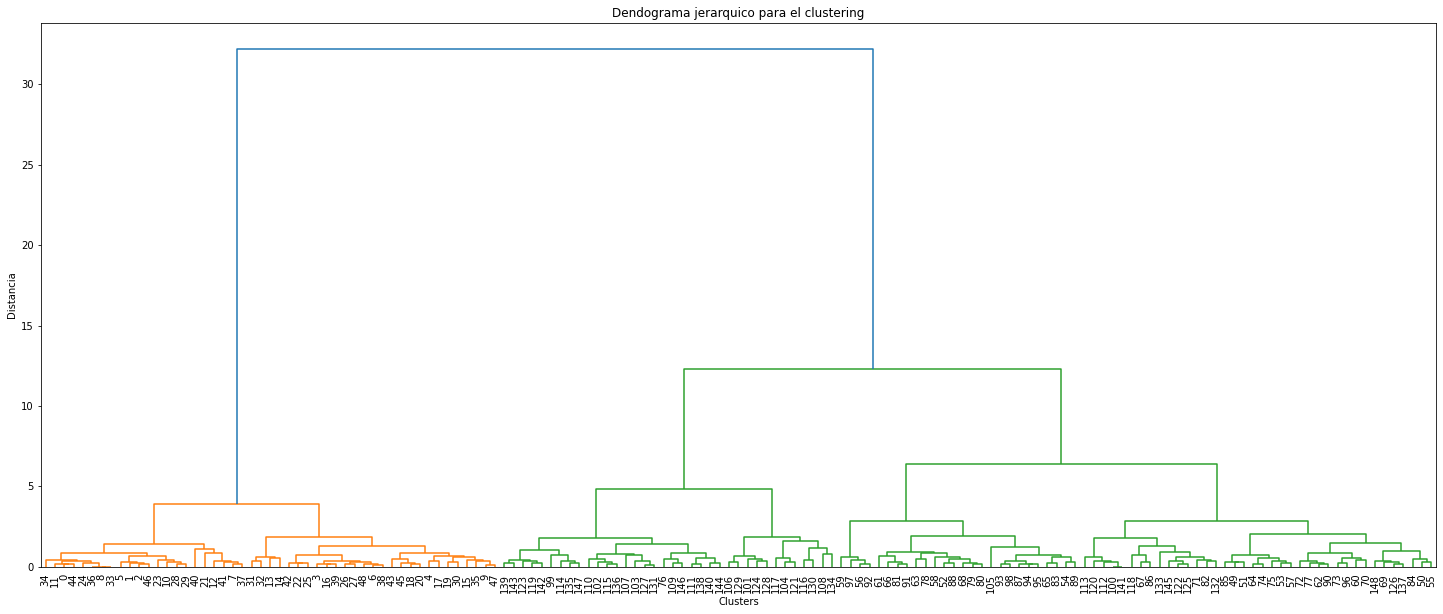

In [40]:
Z = linkage(data[values], 'ward', metric='euclidean')
Z
plt.figure(figsize=(25, 10))
plt.title('Dendograma jerarquico para el clustering')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()

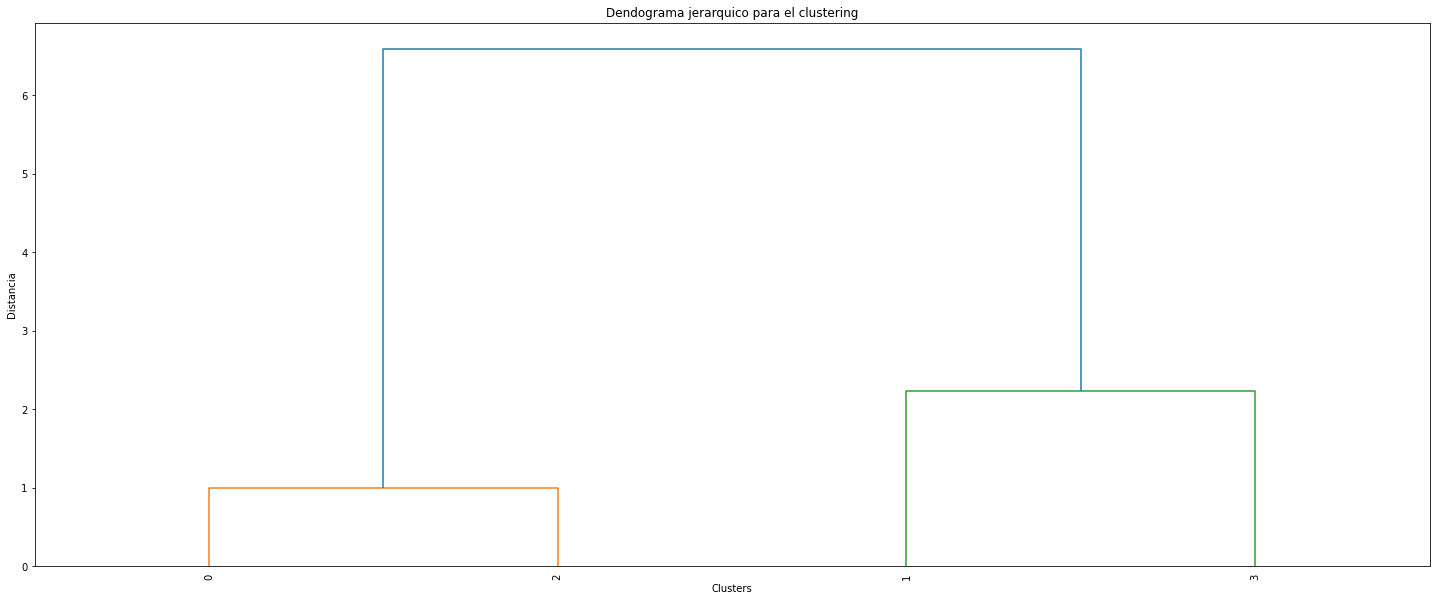

In [19]:
Z = linkage(data[values], 'average')
Z
plt.figure(figsize=(25, 10))
plt.title('Dendograma jerarquico para el clustering')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()

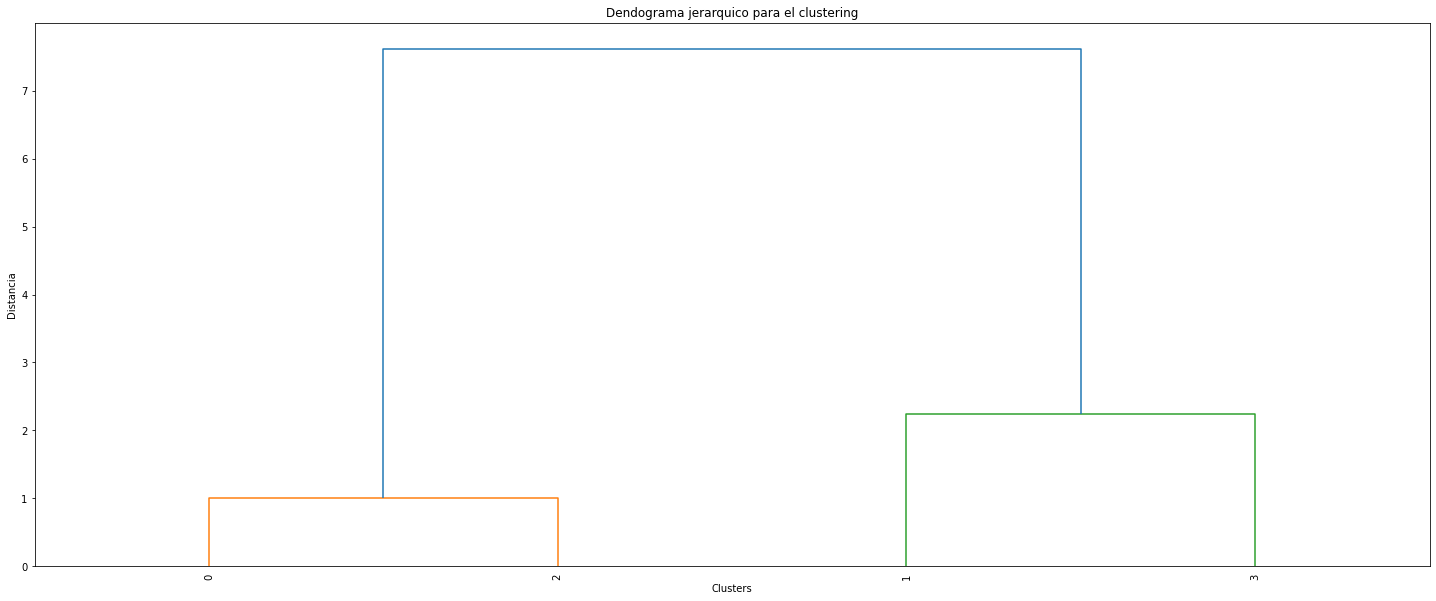

In [20]:
Z = linkage(data[values], 'complete')
Z
plt.figure(figsize=(25, 10))
plt.title('Dendograma jerarquico para el clustering')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=10.0)
plt.show()

### Dendograma personalizado

In [21]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    #print(ddata)
    
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerárquico con dendograma truncado')
        plt.xlabel('Indice del dataset (o tamaño de cluster)')
        plt.ylabel('Distancia')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate('%.3g'%y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
                
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata

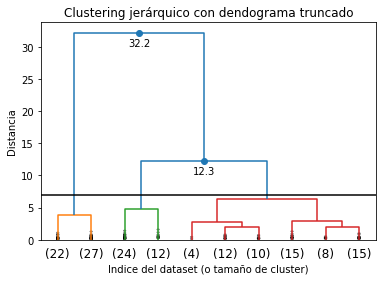

In [41]:
dendrogram_tune(Z, truncate_mode='lastp', p=10, leaf_font_size=12., show_contracted=True, annotate_above=8, max_d=7)
plt.show()